In [1]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wine Wrangling 
#
##########################################################################################


In [2]:
##################################################################################################################
#
# YouDo:
#    1) Make a copy of this notebook with your name as a suffix:  
#       BIOS6644_Wine_Wrangling_FirstLast.ipynb
#    2) Do all work in this new notebook.
#    3) Submit completed work via GitHub pull request
#
##################################################################################################################


In [3]:
# Standard imports
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib notebook
import numpy as np

## Fetch the data

https://archive.ics.uci.edu/ml/machine-learning-databases/wine/

You'll need to fetch both wine.data and wine.names

## Build a  list of field names


In [4]:

##################################################################################################################
#
# YouDo:
#    1) Read (with your eyes--not code) the wine.names file and 
#    2) inspect wine.data for structure 
#    3) Review the features of python strings with particular attention to triple-quoted strings:
#         https://docs.python.org/3/tutorial/introduction.html#strings
#
##################################################################################################################
#
# Notice that in wine.names, there's a list of column names in nicely human-readable format.   
# Also notice that wine.data doesn't have a header row
#
# In python, it's pretty easy to take that list of column names and make it usable in our code.
# You could, of course, hand type it, but that's not a scalable solution.
#
#The list looks like this:
#
#	1) Alcohol
# 	2) Malic acid
# 	3) Ash
#	4) Alcalinity of ash  
# ...


# Using a simple cut & paste, I've grabbed the list and made it into a triple-quoted string.


In [5]:
colnames = """
	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline """

##################################################################################################################
#
# YouDo:
#    1) Convert the given triple-quoted string colnames into a list of field names.   
#        a) Ensure that the list has 13 elements
#        b) Ensure each entry has no space characters--replace with underscores
#        c) It should look like this:
#            col_name_list = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', ...
#
#  Hint:  My solution made great use of the string methods:
#       .strip()
# and   .replace()


#  1)
#######################################  BEGIN STUDENT CODE  #####################################################


#######################################   END STUDENT CODE   #####################################################




In [6]:
colnames

'\n\t1) Alcohol\n \t2) Malic acid\n \t3) Ash\n\t4) Alcalinity of ash  \n \t5) Magnesium\n\t6) Total phenols\n \t7) Flavanoids\n \t8) Nonflavanoid phenols\n \t9) Proanthocyanins\n\t10)Color intensity\n \t11)Hue\n \t12)OD280/OD315 of diluted wines\n \t13)Proline '

In [7]:
NEWcolnames=colnames.strip().replace(")","")
print(NEWcolnames)

1 Alcohol
 	2 Malic acid
 	3 Ash
	4 Alcalinity of ash  
 	5 Magnesium
	6 Total phenols
 	7 Flavanoids
 	8 Nonflavanoid phenols
 	9 Proanthocyanins
	10Color intensity
 	11Hue
 	12OD280/OD315 of diluted wines
 	13Proline


In [8]:
NEWcolnames2=''.join([i for i in NEWcolnames if not i.isdigit()])
print(NEWcolnames2)

 Alcohol
 	 Malic acid
 	 Ash
	 Alcalinity of ash  
 	 Magnesium
	 Total phenols
 	 Flavanoids
 	 Nonflavanoid phenols
 	 Proanthocyanins
	Color intensity
 	Hue
 	OD/OD of diluted wines
 	Proline


# Read wine.data into a data frame

In [9]:
#################################################################################################################
#
# YouDo:
#    1) read the data into a dataframe called df
#       a) Ensure that you don't read the first row of data as the header
#           (check the help file: help(pd.read_csv) under "header")
#       b) df should have the shape 178 rows by 14 columns
#
#
#################################################################################################################

# 1) 
#######################################  BEGIN STUDENT CODE  #####################################################
# Read the data
winedata = pd.read_csv(('wine.data'), header=None)
#######################################   END STUDENT CODE   #####################################################
winedata


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


## Add column names to the df

In [10]:
#################################################################################################################
#
# YouDo:
#    1) Add column names to the df
#       Note:  There are 13 column names in our list but 14 in the data
#              A careful reading of wine.names will give you the final column name
#  

#######################################  BEGIN STUDENT CODE  #####################################################
df = pd.read_csv("wine.data", names=['','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])
df
#######################################   END STUDENT CODE   #####################################################

## Instructor Comment:
## That way works, too :)


,,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


## An example analysis:  Principal Components Analysis

In [12]:
# adapted from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("wine.data", names=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])

features = ['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'] # Separating out the features
x = df.loc[:, features].values # Separating out the target
y = df.loc[:,['Class']].values # Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principalDf['Category'] = y

Text(0, 0.5, 'Second Principle Component')

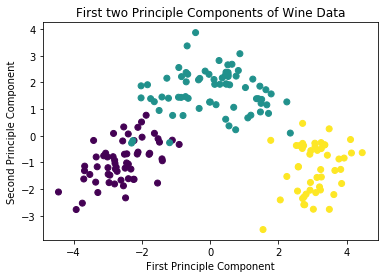

In [13]:
# Make a scatter plot of the principal components of wines--dots colored by "Class" 
fig, ax = plt.subplots()

thisclass = principalDf
ax.scatter(thisclass.PC1, thisclass.PC2, c=thisclass.Category)

plt.title('First two Principle Components of Wine Data')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

In [14]:
# Explained variance
print('Explained Variance: {}'.format(pca.explained_variance_ratio_))


Explained Variance: [0.39542486 0.17836259]


In [25]:
fixed_colnames = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [34]:
# PCA Loading scores
pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'] )

,PC1,PC2
0,0.393670,-0.005690
1,-0.136325,-0.484161
2,0.222676,-0.223591
3,-0.002258,-0.315856
4,0.224298,0.011616
5,-0.124630,-0.300551
6,-0.359264,-0.067120
7,-0.390712,0.001313
8,0.267001,-0.026989
9,-0.279063,-0.041223


In [ ]:

##################################################################################################################
#
# YouDo:
#    1) Ensure your file is called BIOS6644_Wine_Wrangling_FirstLast
#    2) Submit via pull-request
#
##################################################################################################################
